<h1 align="center">LABORATORI 1<br><br> PROPIETATS ESTOCÀSTIQUES DEL LLENGUATGE NATURAL<br></h1>

Inicialitzacions. Si algun package no s'importa bé fer "pip install package" a la línia de comandes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
from math import log2, log, sqrt, inf
from random import choice, choices
import numpy as np
from prettytable import PrettyTable
import os
os.getcwd()

'/Users/tomas.gadea/tomasgadea/ACADEMIC/GCED/q3/TEOI/NLP-StochasticProperties'

S'han proporcionat textos de prova en una carpeta de nom "textos". Per llegir-los s'ha de posar el directori de treball en aquesta carpeta

In [2]:
os.chdir("./texts");
os.getcwd()

'/Users/tomas.gadea/tomasgadea/ACADEMIC/GCED/q3/TEOI/NLP-StochasticProperties/texts'

Introducció de diferents textos.

N'hi ha sis que són novel·les escrites en sis llengües diferents: català, castellà, francès, italià, anglès i alemany; han estat simplificats de manera que només apareixen lletres minúscules -sense accents ni puntuació- i l'espai.

Hi ha un text en castellà sense simplificar: el primer capítol del Quixot.

Hi ha uns altres tres textos curts.

In [3]:
txt_cat = open("cat.txt","r",encoding="utf-8").read();
txt_cas = open("cas.txt","r",encoding="utf-8").read();
txt_fra = open("fra.txt","r",encoding="utf-8").read();
txt_ita = open("ita.txt","r",encoding="utf-8").read();
txt_ang = open("ang.txt","r",encoding="utf-8").read();
txt_ale = open("ale.txt","r",encoding="utf-8").read();
txt = [txt_cat,txt_cas,txt_fra,txt_ita,txt_ang,txt_ale]; # Vector contenint tots sis textos
def idioma(txt): # Funció que retorna l'idioma de cada text
    if txt == txt_cat:
        return "català";
    elif txt == txt_cas:
        return "castellà";
    elif txt == txt_fra:
        return "francès";
    elif txt == txt_ita:
        return "italià";
    elif txt == txt_ang:
        return "anglès";
    elif txt == txt_ale:
        return "alemany";
txt_quijote = open("quijote-1.txt","r",encoding="utf-8").read();
txt_sj="Setze jutges d'un jutjat mengen fetge d'un penjat."
txt_hr="All human beings are born free and equal in dignity and rights. They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood."
txt_ae="Hay dos cosas que son infinitas: el universo y la estupidez humana; de la primera no estoy muy seguro."

Per exemple, el text en català és la novel·la "Paulina Buxareu" de Josep Maria de Sagarra:

In [4]:
txt_cat[:500]

'paulina buxareu josep maria de sagarra primera part i jo vaig coneixer en victor buxareu i buxareu en un dolc poblet de muntanya on em deixo caure gairebe tots els istius en aquest poblet no hi tinc casa propia ni llogada ni una llenqueta de terra ni una tomaquera tan sols no mhi lliga cap interes material per petit que sigui aixo es causa que el seu record no faci trontollar el meu egoisme ni em treu la son el presseguer exposat a la golafreria publica ni el mestre de cases que no fineix mai la'

Mida (nombre total de lletres comptant espais), nombre de paraules i longitud mitjana de les paraules en els sis textos.

In [5]:
taula = PrettyTable()
taula.field_names = ["Idioma", "# lletres", "# paraules", "long mitjana"]
for x in txt:
    taula.add_row([idioma(x),len(x),len(x.split()),round(len(x.replace(' ',''))/len(x.split()),5)])
print(taula)

+----------+-----------+------------+--------------+
|  Idioma  | # lletres | # paraules | long mitjana |
+----------+-----------+------------+--------------+
|  català  |   255911  |   47391    |   4.39999    |
| castellà |  2021834  |   381208   |   4.30376    |
| francès  |   624708  |   111874   |   4.58403    |
|  italià  |  1407864  |   266030   |   4.29212    |
|  anglès  |  1168421  |   216026   |   4.40871    |
| alemany  |  1447031  |   228385   |   5.33593    |
+----------+-----------+------------+--------------+


<h2 align="center">Es crea un model estocàstic d'una llengua a partir d'un text de mostra<br><br>
    Variables aleatòries definides a partir del text:</h2>

<ul>
<li>$X$ és la variable aleatòria que pren valors en $\mathcal X$ que agafa una lletra del text aleatoriament.</li>
<li>$X_n$ és la variable aleatòria que pren valors en $\mathcal X^n$ que agafa $n$ lletres consecutives del text aleatòriament. La variable $X$ és simplement $X_1$.</li>
<li>$Y_r$ i $Z_s$ agafen $r$ i $s$ lletres consecutives del text, les segones a continuació de les primeres, de manera que el vector $(Y_r,Z_s)$ és el mateix que $X_{r+s}$.</li>
</ul>

CONVENI: per tal que les variables vectorials puguin agafar valors que comencen en qualsevol lletra del text se suposa que en acabar el text torna a començar pel principi. Això equival a considerar un "text infinit" format concatenant el text donat amb si mateix indefinidament.

Les funcions següents calculen la probabilitat $\operatorname{Pr}(X_n=x)$ per a una paraula $x\in\mathcal X^n$ i la probabilitat condicionada $\operatorname{Pr}(Z_s=z|Y_r=y)$ per a paraules $y\in\mathcal X^r$ i $z\in\mathcal X^s$. 

In [6]:
def probX(txt,x):
    t = txt+txt[:len(x)-1]; #s'afegeix al final les lletres necessàries per poder calcular X_n
    return t.count(x)/len(txt)

def cond_probZY(txt,y,z):
    w = y+z; # es vol saber quantes vegades z apareix a continuació de y; per això s'ha de buscar la paraula y+z
    t = txt+txt[:len(w)-1];
    ny = t.count(y); 
    if ny == 0:
        return 0; # si Pr(Y=y)=0 la probabilitat condicionada es defineix com a zero
    else:
        return t.count(w)/ny

Exemple: probabilitat (en percentatge) d'un bloc en els diferents idiomes

In [11]:
taula = PrettyTable()
blocs = ["a","j","th","je"]
taula.field_names = ["idioma"] + blocs
for x in txt:
    taula.add_row([idioma(x)] + [100*probX(x,b) for b in blocs])
print(taula)

+----------+-------------------+---------------------+-----------------------+----------------------+
|  idioma  |         a         |          j          |           th          |          je          |
+----------+-------------------+---------------------+-----------------------+----------------------+
|  català  | 11.69078312382039 | 0.24852390088741788 |  0.015630434018076598 | 0.014067390616268938 |
| castellà | 9.916689500720633 |  0.5208142706077749 |          0.0          | 0.07389330676999199  |
| francès  | 7.218252367506099 | 0.46149561074934214 |  0.042099668965340606 |  0.2284267209640344  |
|  italià  |  9.39366302426939 |         0.0         | 0.0022729468187268087 |         0.0          |
|  anglès  |  6.67122552573088 | 0.09277477895381887 |   2.686788409314793   | 0.020797298234112534 |
| alemany  | 5.249161904617109 |  0.193914297620438  |  0.06413131439478491  | 0.06295649505781148  |
+----------+-------------------+---------------------+-----------------------+----

Exemple: probabilitat (en percentatge) que un bloc estigui a l'inici o al final d'una paraula en els diferents idiomes

In [13]:
taula = PrettyTable()
blocs = ["a","n","ico"]
taula.field_names = ["idioma"] + blocs
for x in txt:
    taula.add_row([idioma(x)]+[100*cond_probZY(x," ",b) for b in blocs])
print(taula)
taula = PrettyTable()
blocs = ["a","n","ico"]
taula.field_names = ["idioma"] + blocs
for x in txt:
    taula.add_row([idioma(x)]+[100*cond_probZY(x,b," ") for b in blocs])
print(taula)

+----------+--------------------+--------------------+-----+
|  idioma  |         a          |         n          | ico |
+----------+--------------------+--------------------+-----+
|  català  | 8.294823911713195  | 3.325525943744593  | 0.0 |
| castellà | 8.022391974984785  | 3.028530356131036  | 0.0 |
| francès  | 7.333249906144412  | 2.629744176484259  | 0.0 |
|  italià  | 7.3705418896974795 | 4.137848078426655  | 0.0 |
|  anglès  | 11.062557284771279 | 2.2515808282336387 | 0.0 |
| alemany  | 6.5433369091665385 | 3.390765593186943  | 0.0 |
+----------+--------------------+--------------------+-----+
+----------+--------------------+--------------------+--------------------+
|  idioma  |         a          |         n          |        ico         |
+----------+--------------------+--------------------+--------------------+
|  català  | 46.426900193863226 | 22.00212992545261  |        4.0         |
| castellà | 34.694936134344815 | 30.842274344843503 | 66.58130601792574  |
| francès 

Les funcions següents calculen les distribucions de probabilitat de les variables aleatòries $X_n$ i les variables condicionades $Z_s|Y_r=y$ per a $y\in\mathcal X^r$.

Les distribucions de probabilitat duna variable $X$ que pren $k$ valors en el conjunt $\mathcal X=\{x_1,\dots,x_k\}$ es donen en forma d'una llista $[(x_1,n_1),...,(x_k,n_k)]$ que conté parells $(x_i,n_i)$ formats pels valors $x_i$ que pot prendre la variable i el nombre de vegades $n_i$ que pren cada valor. Així, la probabilitat que una variable $X$ prengui el valor $x_i$ és $$\operatorname{Pr}(X=x_i)=\frac{n_i}{\sum_{j=1}^k n_j}.$$

In [14]:
def varX(txt,n): #els paràmetres són el text i la mida n dels blocs de lletres consecutives que es consideren
    p = txt+txt[:n-1]; # s'afegeixen lletres al final per poder tenir totes les paraules de mida n que comencen a txt
    p = [p[i:i+n] for i in range(len(txt))]; # llista amb totes les paraules de mida n en el text
    #print(p)
    p = dict(Counter(p)); # usant Counter es crea un diccionari que a cada valor li fa correspondre el nombre de vegades que apareix
    #print(p)
    p = [(x,p[x]) for x in p]; # es converteix el diccionari en una llista
    #print(p)
    p.sort(); # s'ordena pels valors (primera component dels parells)
    return p
def cond_varZY(txt,s,y): #els paràmetres són el text, la paraula y respecte la que es condiciona i la mida s dels blocs que venen a continuació
    n = s+len(y); p = txt+txt[:n-1];
    p = [p[i:i+n] for i in range(len(txt))]; # paraules de mida n dins el text
    p = [x for x in p if x[:len(y)] == y]; # se seleccionen només les que comencen per y
    p = [x[-s:] for x in p]; # s'agafen les s últimes lletres
    p = dict(Counter(p)); p = [(x,p[x]) for x in p]; p.sort();
    return p

Alguns exemples:

In [15]:
taula = PrettyTable()
taula.field_names = ["bloc", "# ocurrències", "probabilitat",]
for x in varX(txt_cat,3)[2000:2009]:
    taula.add_row([x[0],x[1],x[1]/len(txt_cat)])
print(taula)

+------+---------------+------------------------+
| bloc | # ocurrències |      probabilitat      |
+------+---------------+------------------------+
| ols  |       28      | 0.00010941303812653618 |
| olt  |      235      | 0.0009182879985620001  |
| olu  |       34      | 0.00013285868915365108 |
| olv  |       2       | 7.815217009038298e-06  |
| olz  |       2       | 7.815217009038298e-06  |
| om   |      340      | 0.0013285868915365107  |
| oma  |       40      | 0.00015630434018076598 |
| omb  |       20      | 7.815217009038299e-05  |
| ome  |      266      | 0.0010394238622020936  |
+------+---------------+------------------------+


In [17]:
taula = PrettyTable()
taula.field_names = ["bloc", "# ocurrències", "probabilitat",]
for x in cond_varZY(txt_cat,3,"pau"):
    taula.add_row([x[0],x[1],x[1]/len(txt_cat)])
print(taula)

+------+---------------+-----------------------+
| bloc | # ocurrències |      probabilitat     |
+------+---------------+-----------------------+
|  al  |       2       | 7.815217009038298e-06 |
|  cl  |       1       | 3.907608504519149e-06 |
|  de  |       1       | 3.907608504519149e-06 |
|  in  |       1       | 3.907608504519149e-06 |
|  qu  |       1       | 3.907608504519149e-06 |
| lin  |      478      | 0.0018678368651601533 |
| pau  |       1       | 3.907608504519149e-06 |
| sa   |       1       | 3.907608504519149e-06 |
+------+---------------+-----------------------+


<h2 align="center">Histogrames de les variables aleatòries $X$<br></h2>

Histogrames de les variables aleatòries $X$ corresponents a agafar una lletra aleatoriament. Per poder comparar-los bé es calculen sobre tots els textos amb el mateix alfabet. En aquest exemple es dibuixen els diagrames amb les lletres escrites en el mateix ordre.

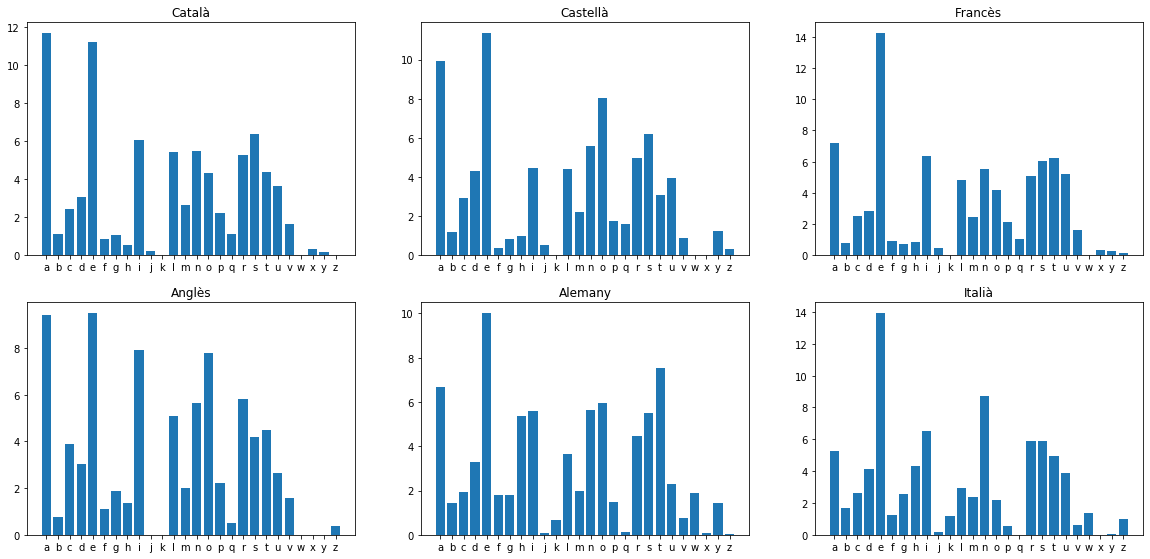

In [25]:
def histograma(txt):
    alf = [x for x in "abcdefghijklmnopqrstuvwxyz"];
    p = [100*txt.count(x)/len(txt) for x in alf]; # les probabilitats es donen en termes de percentatge
    plt.bar(range(len(alf)),p,tick_label=alf)

plt.figure(figsize=(20,30))
plt.subplot(631)
histograma(txt[0])
plt.title('Català');
plt.subplot(632)
histograma(txt[1])
plt.title('Castellà');
plt.subplot(633)
histograma(txt[2])
plt.title('Francès');
plt.subplot(634)
histograma(txt[3])
plt.title('Anglès');
plt.subplot(635)
histograma(txt[4])
plt.title('Alemany');
plt.subplot(636)
histograma(txt[5])
plt.title('Italià');

El mateix amb les variables $Z_1|Y_1={\tt y}$.

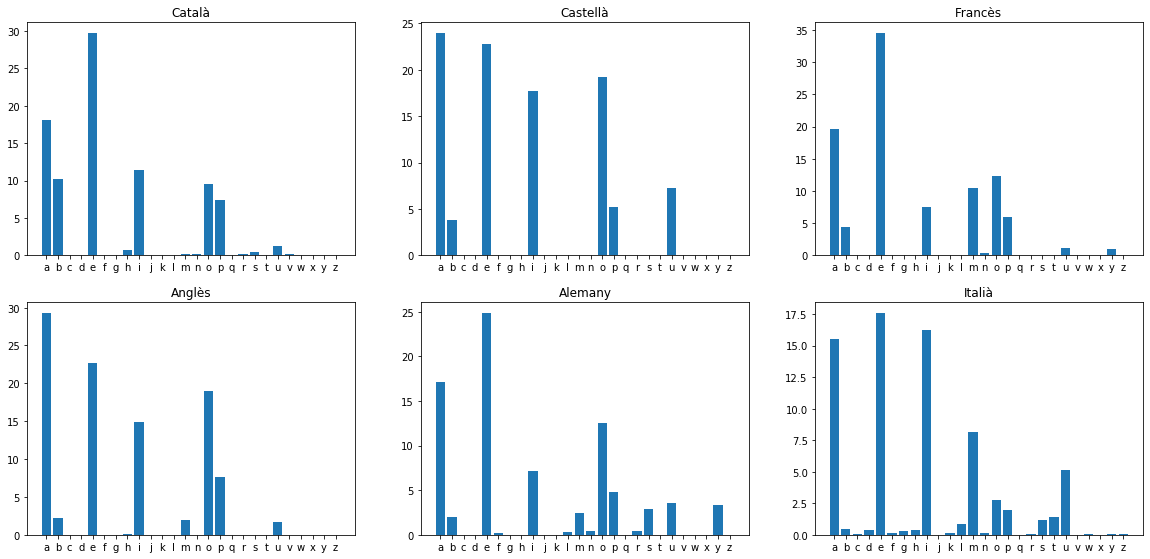

In [26]:
def histograma(txt,y):
    t = txt+txt[:1]; ny = txt.count(y);
    alf = [x for x in "abcdefghijklmnopqrstuvwxyz"];
    p = [100*txt.count(y+x)/ny for x in alf];
    plt.bar(range(len(alf)),p,tick_label=alf)

y = "m";
plt.figure(figsize=(20,30))
plt.subplot(631)
histograma(txt[0],y)
plt.title('Català');
plt.subplot(632)
histograma(txt[1],y)
plt.title('Castellà');
plt.subplot(633)
histograma(txt[2],y)
plt.title('Francès');
plt.subplot(634)
histograma(txt[3],y)
plt.title('Anglès');
plt.subplot(635)
histograma(txt[4],y)
plt.title('Alemany');
plt.subplot(636)
histograma(txt[5],y)
plt.title('Italià');

Ara es dibuixa l'histograma ordenant les lletres en ordre creixent de probabilitats.

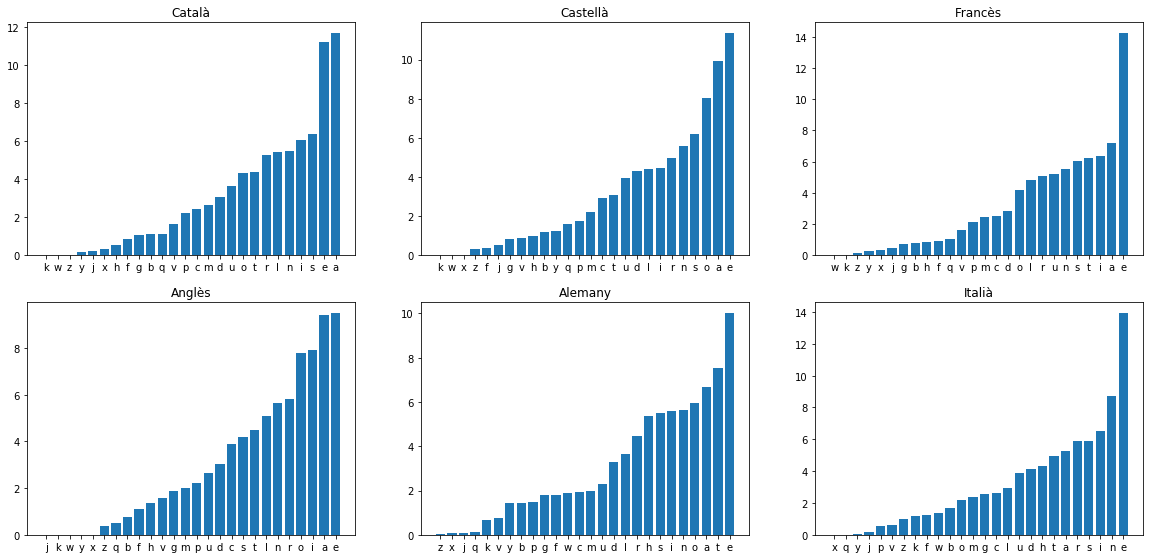

In [28]:
def histograma(txt):
    alf = [x for x in "abcdefghijklmnopqrstuvwxyz"];
    p = [[100*txt.count(x)/len(txt),x] for x in alf];
    p.sort();
    alf = [x[1] for x in p];
    p = [x[0] for x in p];
    plt.bar(range(len(alf)),p,tick_label=alf)

plt.figure(figsize=(20,30))
plt.subplot(631)
histograma(txt[0])
plt.title('Català');
plt.subplot(632)
histograma(txt[1])
plt.title('Castellà');
plt.subplot(633)
histograma(txt[2])
plt.title('Francès');
plt.subplot(634)
histograma(txt[3])
plt.title('Anglès');
plt.subplot(635)
histograma(txt[4])
plt.title('Alemany');
plt.subplot(636)
histograma(txt[5])
plt.title('Italià');

Idem amb les condicionades.

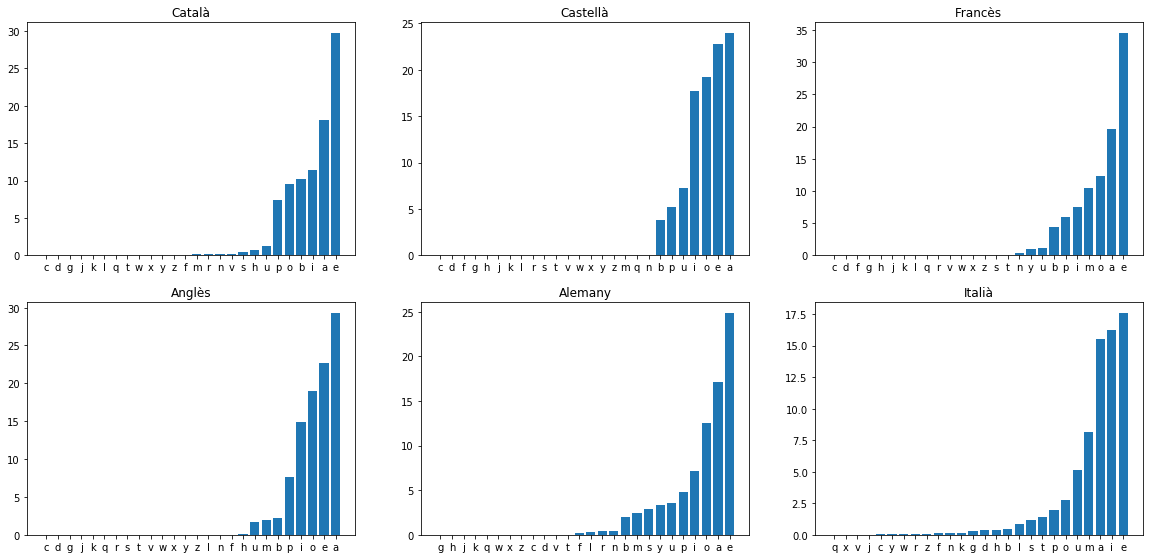

In [29]:
def histograma(txt,y):
    t = txt+txt[:1]; ny = txt.count(y);
    alf = [x for x in "abcdefghijklmnopqrstuvwxyz"];
    p = [[100*txt.count(y+x)/ny,x] for x in alf];
    p.sort();
    alf = [x[1] for x in p];
    p = [x[0] for x in p];
    plt.bar(range(len(alf)),p,tick_label=alf)

y = "m";
plt.figure(figsize=(20,30))
plt.subplot(631)
histograma(txt[0],y)
plt.title('Català');
plt.subplot(632)
histograma(txt[1],y)
plt.title('Castellà');
plt.subplot(633)
histograma(txt[2],y)
plt.title('Francès');
plt.subplot(634)
histograma(txt[3],y)
plt.title('Anglès');
plt.subplot(635)
histograma(txt[4],y)
plt.title('Alemany');
plt.subplot(636)
histograma(txt[5],y)
plt.title('Italià');

<h2 align="center">Comparació de les distribucions de $X$ per a diferents idiomes<br></h2>

Comparació de distribucions de probabilitat.

Es proposa fer servir dues funcions de comparació de distribucions de probabilitat
$(p_1,...p_n)$ i $(q_1,...,q_n)$: la divergència de Kullback-Leibler, o entropia relativa, que apareix a les transparències de teoria (observeu que no és simètrica): $$\sum p_i\log\frac{p_i}{q_i}$$ i la distància de Hellinger (simètrica): $$\sum\big(\sqrt{p_i}-\sqrt{q_i}\big)^2.$$
Se'n fan dues versions: en la primera es consideren les distribucions de probabilitat ordenades en funció dels valors de la variable (es comparen probabilitats de cada lletra); en la segona s'ordenen les distribucions per ordre creixent de probabilitats (això potser representa millor la estructura del procés que es vol estudiar, tot i que la interpretació és discutible); a més, en aquest segon cas s'eliminen els valors de probabilitat zero per a calcular la divergència.

<h4 style="color:red">Exercici 1: programeu les funcions divKL, divKL_ord, distH i distH_ord que calculen les distàncies indicades. A continuació podreu calcular taules on veureu quins idiomes estan més a prop d'altres, segons les distàncies considerades i també segons si s'ordenen o no les probabilitats.</h4>

In [39]:
def divKL(p,q):
    n = len(p) # equivalentment len(q)
    div = 0
    for i in range(n):
        if p[i] != 0 and q[i] != 0:
            div += p[i] * log2(p[i]/q[i])
    return div

def divKL_ord(pp,qq):
    n = len(pp) # equivalentment len(qq)
    pp.sort()
    qq.sort()
    div = 0
    for i in range(n):
        if pp[i] != 0 and qq[i] != 0:
            div += pp[i] * log2(pp[i]/qq[i])
    return div

def distH(p,q):
    n = len(p) # equivalentment len(q)
    dist = 0
    for i in range(n):
        dist += (sqrt(p[i]) - sqrt(q[i])) ** 2
    return dist

def distH_ord(pp,qq):
    n = len(pp) # equivalentment len(qq)
    pp.sort()
    qq.sort()
    dist = 0
    for i in range(n):
        dist += (sqrt(pp[i]) - sqrt(qq[i])) ** 2
    return dist

def compara(txt1,txt2,fun):
    alf = [x for x in "abcdefghijklmnopqrstuvwxyz "];
    p1 = [txt1.count(x)/len(txt1) for x in alf];
    p2 = [txt2.count(x)/len(txt2) for x in alf];
    div = fun(p1,p2);
    return round(100*div,5)

In [40]:
taula = PrettyTable()
taula.field_names = [" "] + [idioma(x) for x in txt]
for x in txt:
    taula.add_row([idioma(x)] + [compara(x,y,divKL) for y in txt])
print(taula)
taula = PrettyTable()
taula.field_names = [" "] + [idioma(x) for x in txt]
for x in txt:
    taula.add_row([idioma(x)] + [compara(x,y,divKL_ord) for y in txt])
print(taula)

+----------+----------+----------+----------+----------+----------+----------+
|          |  català  | castellà | francès  |  italià  |  anglès  | alemany  |
+----------+----------+----------+----------+----------+----------+----------+
|  català  |   0.0    | 6.62874  | 3.61598  | 8.58891  | 19.71494 | 28.4883  |
| castellà | 7.73744  |   0.0    | 8.61522  | 3.79887  | 19.97182 | 35.47906 |
| francès  | 3.58544  | 8.75826  |   0.0    | 10.20879 | 18.20181 | 23.38951 |
|  italià  | 7.38398  | 9.02484  |  9.388   |   0.0    | 16.35104 | 24.97143 |
|  anglès  | 18.05652 | 41.4675  | 38.76888 | 6.17648  |   0.0    | 15.8405  |
| alemany  | 20.23841 | 37.74494 | 38.30226 | 13.59026 | 13.34577 |   0.0    |
+----------+----------+----------+----------+----------+----------+----------+
+----------+---------+----------+---------+----------+---------+---------+
|          |  català | castellà | francès |  italià  |  anglès | alemany |
+----------+---------+----------+---------+----------+------

In [38]:
taula = PrettyTable()
taula.field_names = [" "] + [idioma(x) for x in txt]
for x in txt:
    taula.add_row([idioma(x)] + [compara(x,y,distH) for y in txt])
print(taula)
taula = PrettyTable()
taula.field_names = [" "] + [idioma(x) for x in txt]
for x in txt:
    taula.add_row([idioma(x)] + [compara(x,y,distH_ord) for y in txt])
print(taula)

+----------+----------+----------+---------+---------+---------+----------+
|          |  català  | castellà | francès |  italià |  anglès | alemany  |
+----------+----------+----------+---------+---------+---------+----------+
|  català  |   0.0    | 2.38106  | 1.24507 | 2.73997 | 8.72717 | 10.24761 |
| castellà | 2.38106  |   0.0    | 2.94732 | 3.95458 | 8.24528 | 11.06464 |
| francès  | 1.24507  | 2.94732  |   0.0   |  3.7395 | 7.67912 | 8.32476  |
|  italià  | 2.73997  | 3.95458  |  3.7395 |   0.0   | 7.87765 | 9.28252  |
|  anglès  | 8.72717  | 8.24528  | 7.67912 | 7.87765 |   0.0   | 4.71398  |
| alemany  | 10.24761 | 11.06464 | 8.32476 | 9.28252 | 4.71398 |   0.0    |
+----------+----------+----------+---------+---------+---------+----------+
+----------+---------+----------+---------+---------+---------+---------+
|          |  català | castellà | francès |  italià |  anglès | alemany |
+----------+---------+----------+---------+---------+---------+---------+
|  català  |   0.0

<h2 align="center">Creació de text artificial amb les propietats estocàstiques d'un text donat<br></h2>

<h4 style="color:red">Exercici 2: programeu una funció crea_text que fabrica text artificial de tal manera que els blocs de mida $n$ es generen amb la probabilitat d'aquests blocs en el text. La variable $N$ indica la mida del text artificial generat.<br>
Indicació: no és immediat; podeu fer servir la funció choices del package random.</h4>

Funció que crea un text de mida N a partir de la cadena de Markov d'ordre n determinada pel text

In [ ]:
def crea_text(txt,n,N):

    return t

Exemples:

In [ ]:
[(k+1,crea_text(txt_sj,k+1,len(txt_sj))) for k in range(10)]

In [ ]:
[(k+1,crea_text(txt_hr,k+1,len(txt_hr))) for k in range(10)]

In [ ]:
[(k+1,crea_text(txt_ae,k+1,len(txt_ae))) for k in range(10)]

<h2 align="center">Càlcul d'entropies<br></h2>

<h4 style="color:red">Exercici 3: programeu les funcions següents per calcular entropies.<br><br>Un cop programades podeu calcular les taules dels exemples que venen a continuació. Interpreteu els resultats.<h4>

Funcions per calcular entropies.

In [ ]:
def entropia(pp): # entropia d'una distribució: el paràmetre pp és una llista de nombres que sumen 1.

    return H

def entr(txt,n): # entropia de la variable aleatòria varX(txt,n)

    return H
    
def cond_entr_word(txt,s,par): # entropia condicionada de la variable varZY(txt,s,par)

    return H

def cond_entr(txt,r,s): # entropia condicionada de la variable Z_s respecte la variable Y_r

    return HZY

Entropies per lletra de blocs de mides diferents, per als sis idiomes

In [ ]:
taula = PrettyTable()
taula.field_names = ["mida bloc"] + [idioma(x) for x in txt]
for n in range(5):
    taula.add_row([n+1] + [round(entr(x,n+1)/(n+1),5) for x in txt])
print(taula)

Entropia condicionada per lletre dels blocs de mides diferents després de la lletra q en els diferents idiomes

In [ ]:
taula = PrettyTable()
taula.field_names = ["mida bloc"] + [idioma(x) for x in txt]
for n in range(5):
    taula.add_row([n+1] + [round(cond_entr_word(x,n+1,"q")/(n+1),5) for x in txt])
print(taula)